In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.vector import dynamicsymbols
from sympy import symbols, cos, sin, diff, sqrt, init_printing, latex, Symbol, Eq, solve, lambdify
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"

# Make printouts look nicer
latexReplaceRules = {
    r'{\left(t \right)}':r' ',
    r'\frac{d}{d t}':r'\dot',
    r'\frac{d^{2}}{d t^{2}}':r'\ddot',
}
def latexNew(expr,**kwargs):
    retStr = latex(expr,**kwargs)
    for _,__ in latexReplaceRules.items():
        retStr = retStr.replace(_,__)
    return retStr
init_printing(latex_printer=latexNew)

In [8]:
G, M, omega, m, m0, f, a, tau = symbols(r"G, M, \Omega, m, m_0, f, a, \tau", real=True)

t=Symbol('t')

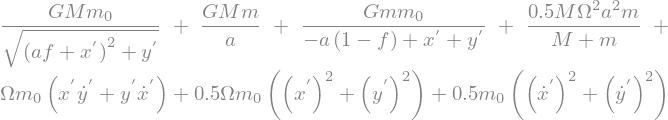

In [10]:
x, y = dynamicsymbols("x^', y^'", real=True)
x_dot = x.diff()
y_dot = y.diff()

L = (1/2) * (M*m)/(M+m) * a**2 * omega**2 + (1/2)*m0*(x_dot**2 + y_dot**2) + (1/2)*m0*omega*(x**2+y**2) + m0*omega*(x*y_dot + x_dot*y) + (G*M*m)/a + (G*M*m0)/(sqrt((x+f*a)**2 + y)) + (G*m*m0)/(sqrt(x-(1-f)*a)**2 + y)
L

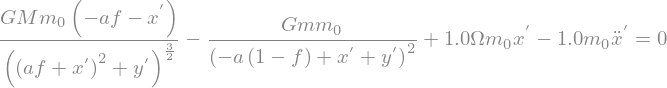

In [11]:
x_derivative = L.diff(x)
x_dot_derivative = L.diff(x_dot)
x_dot_second_derivative = x_dot_derivative.diff(t)

# Euler-Lagrange Equation for x 
ELx = Eq(x_derivative- x_dot_second_derivative, 0)
ELx

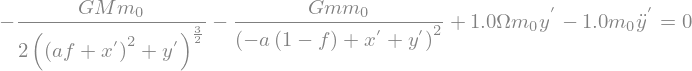

In [12]:
y_derivative = L.diff(y)
y_dot_derivative = L.diff(y_dot)
y_dot_second_derivative = y_dot_derivative.diff(t)

# Euler-Lagrange Equation for y
ELy = Eq(y_derivative- y_dot_second_derivative, 0)

ELy

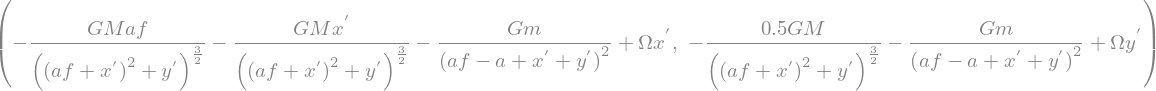

In [13]:
# Isolating x & y double dot
x_doubledot= solve(ELx, x_dot.diff(t))[0] 
y_doubledot= solve(ELy, y_dot.diff(t))[0]

x_doubledot, y_doubledot